In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
#Going to pickle processed data for later
ProcessedData ={}

## Housing values from Zillows

In [237]:
df_county = pd.read_csv('County_Zhvi_AllHomes.csv',encoding='latin-1')
df_county = df_county[df_county.State =='IN']
df_county.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
54,1165,Marion County,IN,Indianapolis-Carmel-Anderson,18,97,55,NaN,NaN,NaN,...,143487,143814,144147,144491,145655,146936,148115,148663,149503,151010
130,221,Lake County,IN,Chicago-Naperville-Elgin,18,89,131,NaN,NaN,NaN,...,153958,154751,155672,156600,157517,158590,159567,160530,161321,162255
181,367,Allen County,IN,Fort Wayne,18,3,182,NaN,NaN,NaN,...,143118,143855,144470,145234,146110,147064,147891,148720,149677,150845
234,2318,Hamilton County,IN,Indianapolis-Carmel-Anderson,18,57,235,NaN,NaN,NaN,...,285382,285833,286661,287659,288708,289518,290281,291492,292851,294430
244,2849,Saint Joseph County,IN,South Bend-Mishawaka,18,141,245,NaN,NaN,NaN,...,129993,130867,131349,131888,132293,132972,133437,133882,133814,134133


In [253]:
def get_datetimes(df, border, form = '%Y-%m' ):
    """
        change the column data type from str to datetime 
        input: 
            df = DataFrame with column names with time and others, 
            border = the name of the column that is the one before the time series begin
            form = format for date and time
        return: the datetime index
    """
    border = list(df.columns).index(border)+1#find the first time column
    return pd.to_datetime(df.columns.values[border:], format= form)

In [371]:
time = get_datetimes(df_county,'SizeRank')

In [372]:
time

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', length=287, freq=None)

In [387]:
df_county_available = pd.DataFrame()
df_county_available['RegionName']= df_county.RegionName
# df_county_available['CountyName']= df_county.CountyName
border = list(df_county.columns).index('SizeRank')+1
df_county_available[time] = df_county[df_county.columns[border:]]

In [388]:
df_county_available.head()

,RegionName,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
54,Marion County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,143487,143814,144147,144491,145655,146936,148115,148663,149503,151010
130,Lake County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153958,154751,155672,156600,157517,158590,159567,160530,161321,162255
181,Allen County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,143118,143855,144470,145234,146110,147064,147891,148720,149677,150845
234,Hamilton County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,285382,285833,286661,287659,288708,289518,290281,291492,292851,294430
244,Saint Joseph County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129993,130867,131349,131888,132293,132972,133437,133882,133814,134133


In [389]:
df_county_available.RegionName.shape

(92,)

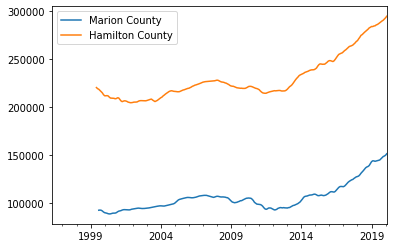

In [390]:
df_county_available.set_index('RegionName', inplace = True)
df_county_available.loc['Marion County'].plot()
df_county_available.loc['Hamilton County'].plot()
plt.legend()
# county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

# plt.title(county +', '+ str(46227) + ', housing price trend')

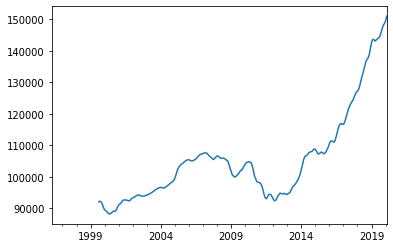

In [391]:
df_county_available = df_county_available.T
df_county_available['Marion County'].plot()

In [392]:
df_county_available.index[0]

Timestamp('1996-04-01 00:00:00')

In [393]:
df_county_available.index = pd.DatetimeIndex(df_county_available.index)

In [394]:
df_house_annualmean = df_county_available.groupby(lambda x:x.year).mean()

In [396]:
df_house_annualmean.index

Int64Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020],
           dtype='int64')

In [397]:
df_house_annualmean.index = pd.to_datetime(df_house_annualmean.index, format = '%Y')

In [398]:
df_house_annualmean.index

DatetimeIndex(['1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

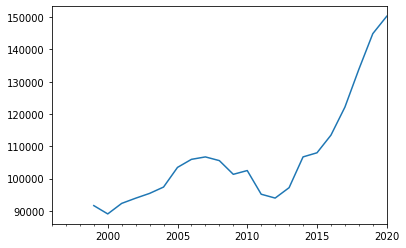

In [399]:
df_house_annualmean['Marion County'].plot()

### Saving data

In [406]:
ProcessedData['df_county_available'] = df_county_available
ProcessedData['df_house_annualmean'] = df_house_annualmean

## Educational Attainment for Bachelor Degree
Number of people with Bachelor Degree in each county of Indiana

In [130]:
xls = pd.ExcelFile('educationAttainmnet_combined.xlsx')
df1 = pd.read_excel(xls, '2018')

In [131]:
df1.head()

,"Education Attainment - Bachelor's Degree""Geography""",statefips,countyfips,year,Data
0,"Adams County, IN",18,1,2018,2242
1,"Allen County, IN",18,3,2018,44188
2,"Bartholomew County, IN",18,5,2018,10687
3,"Benton County, IN",18,7,2018,782
4,"Blackford County, IN",18,9,2018,611


In [132]:
column_list = list(df1.columns)
column_list[0] = 'County'

In [133]:
df1.columns = column_list

In [134]:
for i in range(1,9):
    yr = str(2018 - i)
    df2 = pd.read_excel(xls, yr)
    column_list_updated =[x + '_'+ yr for x in column_list] 
    df2.columns = column_list_updated
    df1 = df1.merge(df2, left_on = 'County', right_on = column_list_updated[0])

In [135]:
df1.head()

,County,statefips,countyfips,year,Data,County_2017,statefips_2017,countyfips_2017,year_2017,Data_2017,...,County_2011,statefips_2011,countyfips_2011,year_2011,Data_2011,County_2010,statefips_2010,countyfips_2010,year_2010,Data_2010
0,"Adams County, IN",18,1,2018,2242,"Adams County, IN",18,1,2017,2116,...,"Adams County, IN",18,1,2011,1722,"Adams County, IN",18,1,2010,1685
1,"Allen County, IN",18,3,2018,44188,"Allen County, IN",18,3,2017,42678,...,"Allen County, IN",18,3,2011,39980,"Allen County, IN",18,3,2010,39680
2,"Bartholomew County, IN",18,5,2018,10687,"Bartholomew County, IN",18,5,2017,10155,...,"Bartholomew County, IN",18,5,2011,7997,"Bartholomew County, IN",18,5,2010,7834
3,"Benton County, IN",18,7,2018,782,"Benton County, IN",18,7,2017,744,...,"Benton County, IN",18,7,2011,572,"Benton County, IN",18,7,2010,508
4,"Blackford County, IN",18,9,2018,611,"Blackford County, IN",18,9,2017,506,...,"Blackford County, IN",18,9,2011,608,"Blackford County, IN",18,9,2010,693


In [136]:
df1.columns

Index(['County', 'statefips', 'countyfips', 'year', 'Data', 'County_2017',
       'statefips_2017', 'countyfips_2017', 'year_2017', 'Data_2017',
       'County_2016', 'statefips_2016', 'countyfips_2016', 'year_2016',
       'Data_2016', 'County_2015', 'statefips_2015', 'countyfips_2015',
       'year_2015', 'Data_2015', 'County_2014', 'statefips_2014',
       'countyfips_2014', 'year_2014', 'Data_2014', 'County_2013',
       'statefips_2013', 'countyfips_2013', 'year_2013', 'Data_2013',
       'County_2012', 'statefips_2012', 'countyfips_2012', 'year_2012',
       'Data_2012', 'County_2011', 'statefips_2011', 'countyfips_2011',
       'year_2011', 'Data_2011', 'County_2010', 'statefips_2010',
       'countyfips_2010', 'year_2010', 'Data_2010'],
      dtype='object')

In [139]:
Ed_Att = pd.DataFrame()
Ed_Att[df1.columns[0:3]] = df1[df1.columns[0:3]]


In [141]:
df1.head()

,County,statefips,countyfips,year,Data,County_2017,statefips_2017,countyfips_2017,year_2017,Data_2017,...,County_2011,statefips_2011,countyfips_2011,year_2011,Data_2011,County_2010,statefips_2010,countyfips_2010,year_2010,Data_2010
0,"Adams County, IN",18,1,2018,2242,"Adams County, IN",18,1,2017,2116,...,"Adams County, IN",18,1,2011,1722,"Adams County, IN",18,1,2010,1685
1,"Allen County, IN",18,3,2018,44188,"Allen County, IN",18,3,2017,42678,...,"Allen County, IN",18,3,2011,39980,"Allen County, IN",18,3,2010,39680
2,"Bartholomew County, IN",18,5,2018,10687,"Bartholomew County, IN",18,5,2017,10155,...,"Bartholomew County, IN",18,5,2011,7997,"Bartholomew County, IN",18,5,2010,7834
3,"Benton County, IN",18,7,2018,782,"Benton County, IN",18,7,2017,744,...,"Benton County, IN",18,7,2011,572,"Benton County, IN",18,7,2010,508
4,"Blackford County, IN",18,9,2018,611,"Blackford County, IN",18,9,2017,506,...,"Blackford County, IN",18,9,2011,608,"Blackford County, IN",18,9,2010,693


In [142]:
Ed_Att[2018] = df1['Data']

In [143]:
for i in range(2010,2018):
    yr = i
    column_name = 'Data_'+ str(yr)
    Ed_Att[yr] = df1[column_name]

In [144]:
Ed_Att

,County,statefips,countyfips,2018,2010,2011,2012,2013,2014,2015,2016,2017
0,"Adams County, IN",18,1,2242,1685,1722,1930,1972,1982,2061,2311,2116
1,"Allen County, IN",18,3,44188,39680,39980,39948,39766,40197,40881,42160,42678
2,"Bartholomew County, IN",18,5,10687,7834,7997,8196,8422,9105,9697,9685,10155
3,"Benton County, IN",18,7,782,508,572,581,656,673,709,753,744
4,"Blackford County, IN",18,9,611,693,608,596,571,619,575,546,506
...,...,...,...,...,...,...,...,...,...,...,...,...
87,"Washington County, IN",18,175,1605,996,1010,1097,1211,1212,1177,1399,1425
88,"Wayne County, IN",18,177,4841,4368,4456,4734,4709,4870,4711,4611,4901
89,"Wells County, IN",18,179,2333,1698,1678,1880,1959,2145,2214,2219,2368
90,"White County, IN",18,181,1815,1567,1665,1632,1661,1614,1732,1730,1781


In [259]:
time =  get_datetimes(Ed_Att, 'countyfips','%Y')

In [260]:
time

DatetimeIndex(['2018-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01'],
              dtype='datetime64[ns]', freq=None)

In [261]:
df_Ed_Att = pd.DataFrame()
df_Ed_Att['RegionName'] = Ed_Att['County']
border = list(Ed_Att.columns).index('countyfips')+1
df_Ed_Att[time] = Ed_Att[Ed_Att.columns[border:]]
df_Ed_Att.head()

,RegionName,2018-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00
0,"Adams County, IN",2242,1685,1722,1930,1972,1982,2061,2311,2116
1,"Allen County, IN",44188,39680,39980,39948,39766,40197,40881,42160,42678
2,"Bartholomew County, IN",10687,7834,7997,8196,8422,9105,9697,9685,10155
3,"Benton County, IN",782,508,572,581,656,673,709,753,744
4,"Blackford County, IN",611,693,608,596,571,619,575,546,506


In [267]:
# a= df_Ed_Att.RegionName[0]
# a[:-4]
b= [a[:-4] for a in df_Ed_Att.RegionName]
df_Ed_Att['RegionName'] = b

In [271]:
df_Ed_Att.set_index('RegionName', drop = True, inplace= True)

In [314]:
df_Ed_Att = df_Ed_Att.T
df_Ed_Att.index = pd.DatetimeIndex(df_Ed_Att.index)

In [345]:
df_Ed_Att.sort_index(inplace = True)

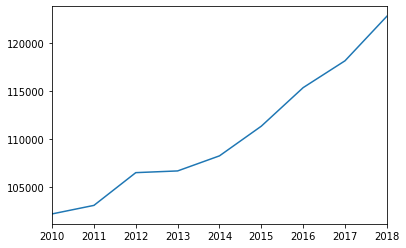

In [348]:
df_Ed_Att['Marion County'].plot()

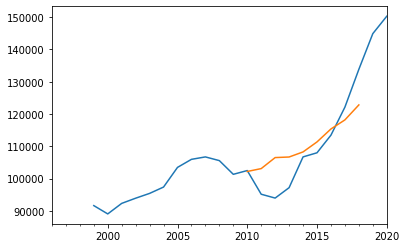

In [400]:
df_house_annualmean['Marion County'].plot()
df_Ed_Att['Marion County'].plot()

Text(0.5, 1.0, 'Marion County')

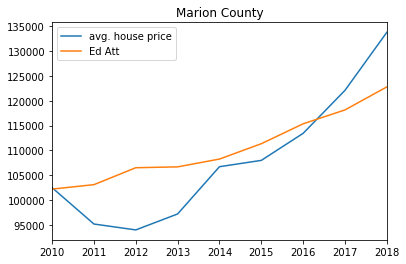

In [485]:
df_house_annualmean[(2009<df_house_annualmean.index.year)&(df_house_annualmean.index.year<2019)]['Marion County'].plot(label='avg. house price')# df_Ed_Att['Marion County'].plot()
df_Ed_Att['Marion County'].plot(label='Ed Att')
plt.legend()
plt.title('Marion County')

### Saving Data

In [407]:
ProcessedData['df_Ed_Att'] = df_Ed_Att

## House Permits

In [147]:
xls_permits = pd.ExcelFile('building_permits_combined 00_20.xlsx')

In [148]:
df00 = pd.read_excel(xls_permits,'00')

In [149]:
df00.head()

,Survey,FIPS,FIPS.1,Region,Division,County,Unnamed: 6,1-unit,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,2-units rep,Unnamed: 23,Unnamed: 24,3-4 units rep,Unnamed: 26,Unnamed: 27,5+units rep,Unnamed: 29
0,Date,State,County,Code,Code,Name,Bldgs,Units,Value,Bldgs,...,Value,Bldgs,Units,Value,Bldgs,Units,Value,Bldgs,Units,Value
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001,1,1,3,6,Autauga County,13,13,690525,0,...,690525,0,0,0,0,0,0,0,0,0
3,200001,1,81,3,6,Lee County,28,28,3392260,1,...,3392260,1,2,73788,2,6,658488,1,27,1434000
4,200001,1,113,3,6,Russell County,2,2,253000,1,...,253000,1,2,90000,0,0,0,0,0,0


In [161]:
df00.columns

Index(['Survey', 'FIPS', 'FIPS.1', 'Region', 'Division', 'County',
       'Unnamed: 6', '1-unit', 'Unnamed: 8', 'Unnamed: 9', '2-units',
       'Unnamed: 11', 'Unnamed: 12', '3-4 units', 'Unnamed: 14', 'Unnamed: 15',
       '5+ units', 'Unnamed: 17', 'Unnamed: 18', '1-unit rep', 'Unnamed: 20',
       'Unnamed: 21', '2-units rep', 'Unnamed: 23', 'Unnamed: 24',
       '3-4 units rep', 'Unnamed: 26', 'Unnamed: 27', ' 5+units rep',
       'Unnamed: 29'],
      dtype='object')

In [162]:
lv1col = []
for col in df00.columns:
    if 'Unnamed:' in col:
        continue
    else:
        lv1col.append(col)

In [163]:
lv1col

['Survey',
 'FIPS',
 'FIPS.1',
 'Region',
 'Division',
 'County',
 '1-unit',
 '2-units',
 '3-4 units',
 '5+ units',
 '1-unit rep',
 '2-units rep',
 '3-4 units rep',
 ' 5+units rep']

In [169]:
for i, col1 in enumerate(lv1col):
    print((i, col1))

(0, 'Survey')
(1, 'FIPS')
(2, 'FIPS.1')
(3, 'Region')
(4, 'Division')
(5, 'County')
(6, '1-unit')
(7, '2-units')
(8, '3-4 units')
(9, '5+ units')
(10, '1-unit rep')
(11, '2-units rep')
(12, '3-4 units rep')
(13, ' 5+units rep')


In [176]:
lv2_codes = list(df00.iloc[0].values[:6])
lv2_codes

['Date', 'State', 'County', 'Code', 'Code', 'Name']

In [189]:
lv2_codes = list(df00.iloc[0].values[:6])
lv2_unit = list(df00.iloc[0].values[6:9])
multilv_cols =[]
for i, col1 in enumerate(lv1col):
    if col1[0] in [str(i) for i in [1,2,3,5]]:
        for col2 in lv2_unit:
            multilv_cols.append((col1,col2))
    elif col1 == ' 5+units rep':
        for col2 in lv2_unit:
            multilv_cols.append((col1,col2))
    else:
        multilv_cols.append((col1, lv2_codes[i]))
#         print(col1, lv2_codes[i])

In [190]:
multilv_cols

[('Survey', 'Date'),
 ('FIPS', 'State'),
 ('FIPS.1', 'County'),
 ('Region', 'Code'),
 ('Division', 'Code'),
 ('County', 'Name'),
 ('1-unit', 'Bldgs'),
 ('1-unit', 'Units'),
 ('1-unit', 'Value'),
 ('2-units', 'Bldgs'),
 ('2-units', 'Units'),
 ('2-units', 'Value'),
 ('3-4 units', 'Bldgs'),
 ('3-4 units', 'Units'),
 ('3-4 units', 'Value'),
 ('5+ units', 'Bldgs'),
 ('5+ units', 'Units'),
 ('5+ units', 'Value'),
 ('1-unit rep', 'Bldgs'),
 ('1-unit rep', 'Units'),
 ('1-unit rep', 'Value'),
 ('2-units rep', 'Bldgs'),
 ('2-units rep', 'Units'),
 ('2-units rep', 'Value'),
 ('3-4 units rep', 'Bldgs'),
 ('3-4 units rep', 'Units'),
 ('3-4 units rep', 'Value'),
 (' 5+units rep', 'Bldgs'),
 (' 5+units rep', 'Units'),
 (' 5+units rep', 'Value')]

In [194]:
multilv_cols_idx = pd.MultiIndex.from_tuples(multilv_cols)

In [199]:
df00.values[2:]

array([['200001', 1, 1, ..., 0, 0, 0],
       ['200001', 1, 81, ..., 1, 27, 1434000],
       ['200001', 1, 113, ..., 0, 0, 0],
       ...,
       ['200012', 55, 133, ..., 0, 0, 0],
       ['200012', 56, 25, ..., 0, 0, 0],
       ['200012', 56, 39, ..., 0, 0, 0]], dtype=object)

In [200]:
df00_test = pd.DataFrame(df00.values[2:],
                        columns= multilv_cols_idx)

In [201]:
df00_test.head()

Survey  FIPS FIPS.1 Region Division                          County 1-unit  \
     Date State County   Code     Code                            Name  Bldgs   
0  200001     1      1      3        6  Autauga County                     13   
1  200001     1     81      3        6  Lee County                         28   
2  200001     1    113      3        6  Russell County                      2   
3  200001     1    125      3        6  Tuscaloosa County                  52   
4  200001     2     13      4        9  Aleutians East Borough              0   

                 2-units  ... 1-unit rep 2-units rep                \
  Units    Value   Bldgs  ...      Value       Bldgs Units   Value   
0    13   690525       0  ...     690525           0     0       0   
1    28  3392260       1  ...    3392260           1     2   73788   
2     2   253000       1  ...     253000           1     2   90000   
3    52  4889075       4  ...    4889075           4     8  464774   
4     0        0       0  ...          0           0     0       0   

  3-4 units rep                5+units rep                 
          Bldgs Units   Value        Bldgs Units    Value  
0             0     0       0            0     0        0  
1             2     6  658488            1    27  1434000  
2             0     0       0            0     0        0  
3             0     0       0            0     0        0  
4             0     0       0            0     0        0  

[5 rows x 30 columns]

In [223]:
df00_test = df00_test[df00_test.FIPS.State == 18]

In [212]:
df00_test[('Multi_unit','Bldgs_total')] = df00_test[('1-unit',  'Bldgs')]+ df00_test[('2-units',  'Bldgs')] + df00_test[('3-4 units',  'Bldgs')] + df00_test[('5+ units',  'Bldgs')]


In [213]:
df00_test[('Multi_unit','Units_total')] = df00_test[('1-unit',  'Units')]+ df00_test[('2-units',  'Units')] + df00_test[('3-4 units',  'Units')] + df00_test[('5+ units',  'Units')]


In [224]:
df00_test.head()

Survey  FIPS FIPS.1 Region Division                          County  \
       Date State County   Code     Code                            Name   
210  200001    18      3      2        3  Allen County                     
211  200001    18     11      2        3  Boone County                     
212  200001    18     13      2        3  Brown County                     
213  200001    18     19      2        3  Clark County                     
214  200001    18     27      2        3  Daviess County                   

    1-unit                 2-units  ... 2-units rep         3-4 units rep  \
     Bldgs Units     Value   Bldgs  ...       Units   Value         Bldgs   
210     83    83  12117305       1  ...           2  200000             0   
211     30    30   4666640       0  ...           0       0             0   
212      8     8    457113       0  ...           0       0             0   
213     46    46   6343094       2  ...           4  165000             0   
214      5     5    794785       0  ...           0       0             0   

                 5+units rep              Multi_unit              
    Units Value        Bldgs Units Value Bldgs_total Units_total  
210     0     0            0     0     0          84          85  
211     0     0            0     0     0          30          30  
212     0     0            0     0     0           8           8  
213     0     0            0     0     0          48          50  
214     0     0            0     0     0           5           5  

[5 rows x 32 columns]

In [220]:
buildingPermits_IN= {}
buildingPermits_IN['2000'] = df00_test
for i in range(1,20):
    if i < 10:
        sheet = '0'+str(i)
    else:
        sheet = str(i)
    df = pd.read_excel(xls_permits,sheet)#load the excel sheet
    df_new = pd.DataFrame(df.values[2:],
                        columns= multilv_cols_idx)
    df_new = df_new[df_new.FIPS.State == 18]
    df_new[('Multi_unit','Bldgs_total')] = df_new[('1-unit',  'Bldgs')]+ df_new[('2-units',  'Bldgs')] + df_new[('3-4 units',  'Bldgs')] + df_new[('5+ units',  'Bldgs')]
    df_new[('Multi_unit','Units_total')] = df_new[('1-unit',  'Units')]+ df_new[('2-units',  'Units')] + df_new[('3-4 units',  'Units')] + df_new[('5+ units',  'Units')]
    year = '20'+ str(i)
    buildingPermits_IN[year] = df_new

In [226]:
for key in buildingPermits_IN.keys():
    print(buildingPermits_IN[key].shape)

(349, 32)
(408, 32)
(408, 32)
(415, 32)
(576, 32)
(409, 32)
(420, 32)
(430, 32)
(431, 32)
(443, 32)
(444, 32)
(444, 32)
(444, 32)
(444, 32)
(444, 32)
(348, 32)
(348, 32)
(348, 32)
(348, 32)
(348, 32)


In [232]:
for key in buildingPermits_IN.keys():
    print('unique number of counties of {}:'.format(key), len(buildingPermits_IN[key][(       'FIPS.1',      'County')].unique()))

unique number of counties of 2000: 34
unique number of counties of 201: 34
unique number of counties of 202: 34
unique number of counties of 203: 35
unique number of counties of 204: 48
unique number of counties of 205: 35
unique number of counties of 206: 35
unique number of counties of 207: 36
unique number of counties of 208: 36
unique number of counties of 209: 37
unique number of counties of 2010: 37
unique number of counties of 2011: 37
unique number of counties of 2012: 37
unique number of counties of 2013: 37
unique number of counties of 2014: 37
unique number of counties of 2015: 29
unique number of counties of 2016: 29
unique number of counties of 2017: 29
unique number of counties of 2018: 29
unique number of counties of 2019: 29


In [233]:
buildingPermits_IN[key][(       'FIPS.1',      'County')].unique()

array([3, 11, 13, 19, 47, 57, 59, 61, 63, 69, 73, 81, 87, 89, 97, 105,
       109, 111, 115, 119, 127, 133, 145, 151, 157, 163, 167, 175, 183],
      dtype=object)

In [234]:
df00 = buildingPermits_IN['2000']
df00[df00[(       'FIPS.1',      'County')]==3]

Survey  FIPS FIPS.1 Region Division                          County  \
        Date State County   Code     Code                            Name   
210   200001    18      3      2        3  Allen County                     
932   200002    18      3      2        3  Allen County                     
1641  200003    18      3      2        3  Allen County                     
2352  200004    18      3      2        3  Allen County                     
3072  200005    18      3      2        3  Allen County                     
3793  200006    18      3      2        3  Allen County                     
4515  200007    18      3      2        3  Allen County                     
5223  200008    18      3      2        3  Allen County                     
5938  200009    18      3      2        3  Allen County                     
6663  200010    18      3      2        3  Allen County                     
7383  200011    18      3      2        3  Allen County                     
8130  200012    18      3      2        3  Allen County                     

     1-unit                 2-units  ... 2-units rep          3-4 units rep  \
      Bldgs Units     Value   Bldgs  ...       Units    Value         Bldgs   
210      83    83  12117305       1  ...           2   200000             0   
932     110   110  18089303       0  ...           0        0             0   
1641    178   178  30835057       0  ...           0        0             0   
2352    158   158  25961110       4  ...           8   598548             0   
3072    143   143  24826319       1  ...           2    96000             0   
3793    204   204  30155141       1  ...           2    87450             1   
4515    122   122  19519191       0  ...           0        0             0   
5223    146   146  19854700       1  ...           2   165084             0   
5938    156   156  24077784      22  ...          44  2042755             1   
6663    139   139  22147288       1  ...           2   103500             0   
7383    128   128  21655142       0  ...           0        0             0   
8130     81    81  12988055       1  ...           2   184084             0   

                    5+units rep                 Multi_unit              
     Units   Value        Bldgs Units    Value Bldgs_total Units_total  
210      0       0            0     0        0          84          85  
932      0       0            0     0        0         110         110  
1641     0       0            0     0        0         178         178  
2352     0       0            1    30   675000         163         196  
3072     0       0            0     0        0         144         145  
3793     4  258000            0     0        0         206         210  
4515     0       0            0     0        0         122         122  
5223     0       0            0     0        0         147         148  
5938     4  400000            5    40  1340400         184         244  
6663     0       0            0     0        0         140         141  
7383     0       0            0     0        0         128         128  
8130     0       0            0     0        0          82          83  

[12 rows x 32 columns]

In [236]:
type(df00[df00[(       'FIPS.1',      'County')]==3])

pandas.core.frame.DataFrame

In [235]:
for key in buildingPermits_IN.keys():
    print(buildingPermits_IN[key].shape, len(buildingPermits_IN[key][(       'FIPS.1',      'County')].unique())*12)

(349, 32) 408
(408, 32) 408
(408, 32) 408
(415, 32) 420
(576, 32) 576
(409, 32) 420
(420, 32) 420
(430, 32) 432
(431, 32) 432
(443, 32) 444
(444, 32) 444
(444, 32) 444
(444, 32) 444
(444, 32) 444
(444, 32) 444
(348, 32) 348
(348, 32) 348
(348, 32) 348
(348, 32) 348
(348, 32) 348


In [232]:
for key in buildingPermits_IN.keys():
    print('unique number of counties of {}:'.format(key), len(buildingPermits_IN[key][(       'FIPS.1',      'County')].unique()))

unique number of counties of 2000: 34
unique number of counties of 201: 34
unique number of counties of 202: 34
unique number of counties of 203: 35
unique number of counties of 204: 48
unique number of counties of 205: 35
unique number of counties of 206: 35
unique number of counties of 207: 36
unique number of counties of 208: 36
unique number of counties of 209: 37
unique number of counties of 2010: 37
unique number of counties of 2011: 37
unique number of counties of 2012: 37
unique number of counties of 2013: 37
unique number of counties of 2014: 37
unique number of counties of 2015: 29
unique number of counties of 2016: 29
unique number of counties of 2017: 29
unique number of counties of 2018: 29
unique number of counties of 2019: 29


In [412]:
df_temp = pd.concat(list(buildingPermits_IN.values()))

In [414]:
df_temp[('County','Name')]

210     Allen County                  
211     Boone County                  
212     Brown County                  
213     Clark County                  
214     Daviess County                
                     ...              
8391    Tippecanoe County             
8392    Vanderburgh County            
8393    Vigo County                   
8394    Washington County             
8395    Whitley County                
Name: (County, Name), Length: 8249, dtype: object

In [420]:
len(df_temp[('County','Name')].unique())

51

In [428]:
df_temp[('County','Name')]= df_temp[('County','Name')].apply(lambda x:x.rstrip())

In [429]:
df_temp[df_temp[('County','Name')]=='Allen County']

Survey  FIPS FIPS.1 Region Division        County 1-unit        \
        Date State County   Code     Code          Name  Bldgs Units   
210   200001    18      3      2        3  Allen County     83    83   
932   200002    18      3      2        3  Allen County    110   110   
1641  200003    18      3      2        3  Allen County    178   178   
2352  200004    18      3      2        3  Allen County    158   158   
3072  200005    18      3      2        3  Allen County    143   143   
...      ...   ...    ...    ...      ...           ...    ...   ...   
5394  201908    18      3      2        3  Allen County    106   106   
6137  201909    18      3      2        3  Allen County    110   110   
6880  201910    18      3      2        3  Allen County    124   124   
7623  201911    18      3      2        3  Allen County    120   120   
8367  201912    18      3      2        3  Allen County    162   162   

               2-units  ... 2-units rep         3-4 units rep                \
         Value   Bldgs  ...       Units   Value         Bldgs Units   Value   
210   12117305       1  ...           2  200000             0     0       0   
932   18089303       0  ...           0       0             0     0       0   
1641  30835057       0  ...           0       0             0     0       0   
2352  25961110       4  ...           8  598548             0     0       0   
3072  24826319       1  ...           2   96000             0     0       0   
...        ...     ...  ...         ...     ...           ...   ...     ...   
5394  28697612       8  ...          16  405000             0     0       0   
6137  29780541       0  ...           0       0             0     0       0   
6880  33570791       1  ...           2   80000             1     3  286098   
7623  32487862       0  ...           0       0             0     0       0   
8367  43858614       0  ...           0       0             0     0       0   

      5+units rep                  Multi_unit              
            Bldgs Units     Value Bldgs_total Units_total  
210             0     0         0          84          85  
932             0     0         0         110         110  
1641            0     0         0         178         178  
2352            1    30    675000         163         196  
3072            0     0         0         144         145  
...           ...   ...       ...         ...         ...  
5394           11   254  29502608         125         376  
6137            0     0         0         110         110  
6880            7    53   4699930         133         182  
7623            1     6    475000         121         126  
8367            0     0         0         162         162  

[240 rows x 32 columns]

In [425]:
s= 'Allen County                  '
s.rstrip()

'Allen County'

In [436]:
permits_by_county ={}
for name in df_temp[('County','Name')].unique():
    permits_by_county[name] = df_temp[df_temp[('County','Name')]==name].reset_index()
    

In [441]:
# pd.to_datetime(permits_by_county['Allen County'][('Survey','Date')][0], format ='%Y%m', errors = 'ignore')
pd.to_datetime(permits_by_county['Allen County'][('Survey','Date')][3], format ='%Y%m')

Timestamp('2000-04-01 00:00:00')

In [443]:
for key in permits_by_county.keys():
    dates = pd.to_datetime(permits_by_county[key][('Survey','Date')], format ='%Y%m')
    permits_by_county[key].set_index(pd.DatetimeIndex(dates), inplace= True)
    permits_by_county[key].drop([('Survey','Date')], axis=1, inplace=True)

In [452]:
TotalPermits_by_county ={}
for key in permits_by_county.keys():
    TotalPermits_by_county[key] = permits_by_county[key][['1-unit','Multi_unit']].drop([ (       '1-unit',       'Value')], axis = 1)
    

In [453]:
TotalPermits_by_county['Marion County']

1-unit        Multi_unit            
                Bldgs Units Bldgs_total Units_total
(Survey, Date)                                     
2000-01-01        237   237         240         251
2000-02-01        262   262         263         266
2000-03-01        376   376         383         405
2000-04-01        359   359         404         587
2000-05-01        358   358         383         588
...               ...   ...         ...         ...
2019-08-01        113   113         119         276
2019-09-01         78    78          80         143
2019-10-01        124   124         126         128
2019-11-01         76    76          79          85
2019-12-01         94    94          95         197

[240 rows x 4 columns]

In [451]:
TotalPermits_by_county['Marion County'].plot()

1-unit        Multi_unit            
                Bldgs Units Bldgs_total Units_total
(Survey, Date)                                     
2000-01-01        237   237         240         251
2000-02-01        262   262         263         266
2000-03-01        376   376         383         405
2000-04-01        359   359         404         587
2000-05-01        358   358         383         588
...               ...   ...         ...         ...
2019-08-01        113   113         119         276
2019-09-01         78    78          80         143
2019-10-01        124   124         126         128
2019-11-01         76    76          79          85
2019-12-01         94    94          95         197

[240 rows x 4 columns]

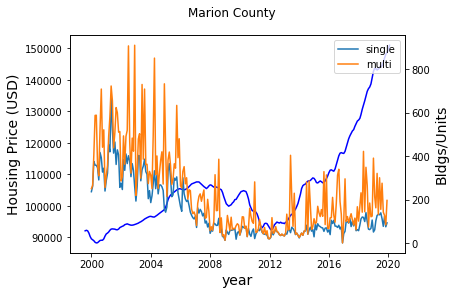

In [465]:
fig, ax = plt.subplots()
ax.plot(df_county_available['Marion County'], color="b")
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Housing Price (USD)", fontsize = 14)
# df_county_available.loc['Hamilton County'].plot()
ax2 = ax.twinx()
ax2.plot(TotalPermits_by_county['Marion County'][[('1-unit', 'Units'),('Multi_unit', 'Units_total')]])
ax2.set_ylabel("Bldgs/Units", fontsize = 14)
ax2.legend(('single','multi'))
plt.suptitle('Marion County')
plt.show()

### Saving Data

In [466]:
ProcessedData['TotalPermits_by_county']=TotalPermits_by_county
ProcessedData['permits_by_county']= permits_by_county

## Population
The population of Indiana counties were found [here](http://www.stats.indiana.edu/population/popTotals/2019_cntyest.asp).

In [467]:
df_populationIN = pd.read_excel('2019_cntyest.xlsx')
#df_populationIN = pd.read_excel('2019_cntyest.xlsx',encoding='latin-1')

In [468]:
df_populationIN

,Geographic Area,Fips Code,Population Estimates\n (as of July 1),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,"April 1, 2010",Unnamed: 13,"Change\n July 1, 2010\n to July 1, 2019",Unnamed: 15,"Rank: Pop Change\n July 1, 2010\n to July 1, 2019",Unnamed: 17,"Change\n July 1, 2018 to July 1, 2019",Unnamed: 19,"Rank: Pop Change\nJuly 1, 2018\n to July 1, 2019",Unnamed: 21
0,NaN,NaN,2019,2018,2017,2016,2015,2014,2013,2012,...,Census,Rank,Number,Percent,Number,Percent,Number,Percent,Number,Percent
1,Indiana,18000.0,6732219,6695497,6658078,6634304,6608422,6593644,6568713,6537703,...,6483802,NaN,241787,0.0372528,NaN,NaN,36722,0.00548458,NaN,NaN
2,Adams County,18001.0,35777,35595,35385,35178,34945,34758,34644,34400,...,34387,45,1333,0.0387005,23,17,182,0.00511308,30,23
3,Allen County,18003.0,379299,375079,371723,369412,367362,365147,363355,360890,...,355329,3,23354,0.0656113,4,12,4220,0.011251,3,7
4,Bartholomew County,18005.0,83779,82722,82213,82231,81458,80497,79655,79001,...,76794,20,6961,0.0906168,12,7,1057,0.0127777,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Washington County,18175.0,28036,27932,27771,27728,27774,27886,27779,27913,...,28262,57,-256,-0.00904849,49,44,104,0.00372333,34,31
90,Wayne County,18177.0,65884,66046,66179,66630,66972,67378,67785,68224,...,68917,24,-3005,-0.0436209,89,81,-162,-0.00245284,84,71
91,Wells County,18179.0,28296,28083,27958,27865,27851,27814,27715,27707,...,27636,58,614,0.0221805,28,24,213,0.00758466,25,15
92,White County,18181.0,24102,24133,24163,24074,24274,24433,24401,24466,...,24643,63,-581,-0.0235385,59,64,-31,-0.00128455,65,64


In [469]:
columns = df_populationIN.iloc[0].values
columns[0:2]= ['Geographic_Area','FipsCode']
df_populationIN.columns= columns

In [472]:
df_populationIN.drop([0], inplace=True)

In [473]:
a= ['Geographic_Area']
for i in range(2019,2009,-1): 
    a.append(i)
Indiana_pop = df_populationIN[a]
Indiana_pop = Indiana_pop.T
Indiana_pop.columns = Indiana_pop.iloc[0]
Indiana_pop.drop(Indiana_pop.index[0],inplace= True)

In [476]:
Indiana_pop.index = pd.to_datetime(Indiana_pop.index,format='%Y' )

In [477]:
Indiana_pop.head()

Geographic_Area,Indiana,Adams County,Allen County,Bartholomew County,Benton County,Blackford County,Boone County,Brown County,Carroll County,Cass County,...,Vermillion County,Vigo County,Wabash County,Warren County,Warrick County,Washington County,Wayne County,Wells County,White County,Whitley County
2019-01-01,6732219,35777,379299,83779,8748,11758,67843,15092,20257,37689,...,15498,107038,30996,8265,62998,28036,65884,28296,24102,33964
2018-01-01,6695497,35595,375079,82722,8653,11924,66930,15230,20188,37895,...,15510,107367,31198,8280,62474,27932,66046,28083,24133,34047
2017-01-01,6658078,35385,371723,82213,8631,12028,65723,15010,20067,37828,...,15503,107569,31380,8204,62401,27771,66179,27958,24163,33722
2016-01-01,6634304,35178,369412,82231,8658,12115,64192,14996,19973,37905,...,15593,107790,31513,8165,62005,27728,66630,27865,24074,33475
2015-01-01,6608422,34945,367362,81458,8693,12242,63033,14994,19887,38081,...,15593,107533,31860,8270,61522,27774,66972,27851,24274,33444


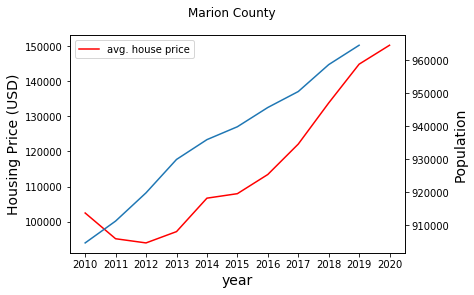

In [495]:
fig, ax = plt.subplots()
# df_house_annualmean[(2015<df_house_annualmean.index.year)]['Marion County'].plot(label='avg. house price',ax= ax)

ax.plot(df_house_annualmean[(2009<df_house_annualmean.index.year)]['Marion County'], color="r",label='avg. house price')
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Housing Price (USD)", fontsize = 14)
ax.legend()
# df_county_available.loc['Hamilton County'].plot()
ax2 = ax.twinx()
ax2.plot(Indiana_pop['Marion County'], label='population')
ax2.set_ylabel("Population", fontsize = 14)

plt.suptitle('Marion County')
plt.show()

### Saving Data

In [496]:
ProcessedData['Indiana_pop']=Indiana_pop

# Pickling processed data

In [497]:
import pickle
pickle.dump(ProcessedData, open("ProcessedData.p","wb"))

## Loading Pickled data

In [ ]:
import pickle
ProcessedData = pickle.load( open( "ProcessedData.p", "rb" ) )